In [1]:
#Brute Force Feature Matcher

In [2]:
#importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

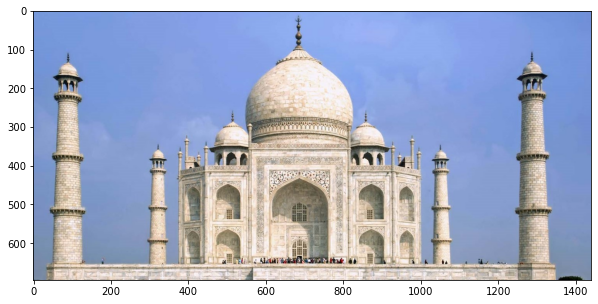

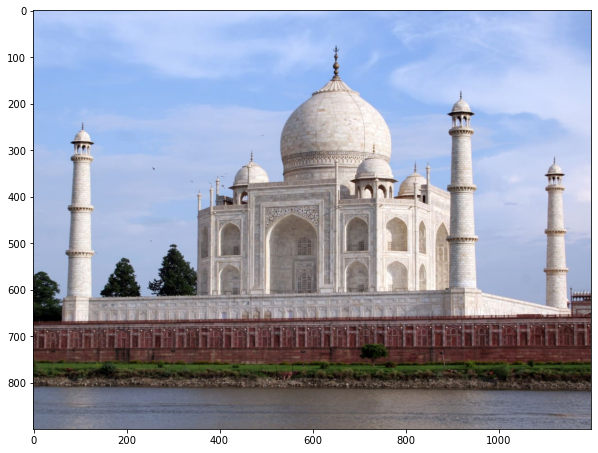

In [7]:
#Loading the images to compare
img1 = cv2.imread('taj3.jpg')
img2 = cv2.imread('taj1.jpg')
#Convrting BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#Converting the images to gray scale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
#Displaying the images
plt.figure(figsize = (10,10))
plt.imshow(img1)
plt.show()
plt.figure(figsize = (10,10))
plt.imshow(img2)
plt.show()

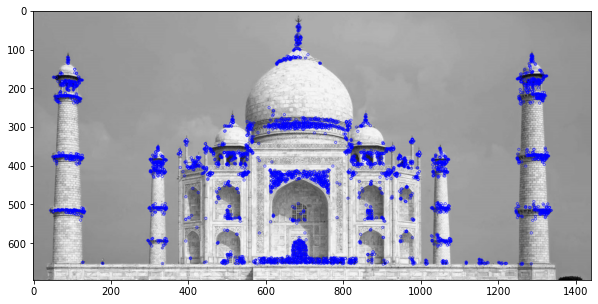

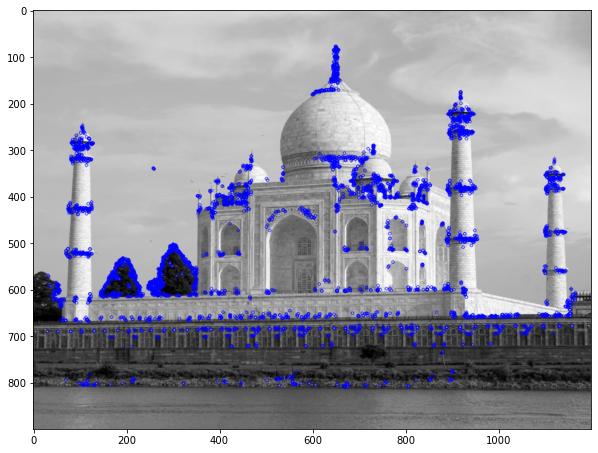

In [23]:
#using ORB for detecting keypoint features
orb = cv2.ORB_create(nfeatures = 5000)
key_points1, descriptors1 = orb.detectAndCompute(img1_gray, None)
key_points2, descriptors2 = orb.detectAndCompute(img2_gray, None)
#displaying ORB features for image1(without size and orientation)
img_display = np.copy(img1)
img_display = cv2.drawKeypoints(img1_gray, key_points1, img_display, color = (0,0,255), flags = 0)
plt.figure(figsize = (10,10))
plt.imshow(img_display)
plt.show()
#displaying ORB features for image2(without size and orientation)
img_display2 = np.copy(img2)
img_display2 = cv2.drawKeypoints(img2_gray, key_points2, img_display2, color = (0,0,255), flags = 0)
plt.figure(figsize = (10,10))
plt.imshow(img_display2)
plt.show()

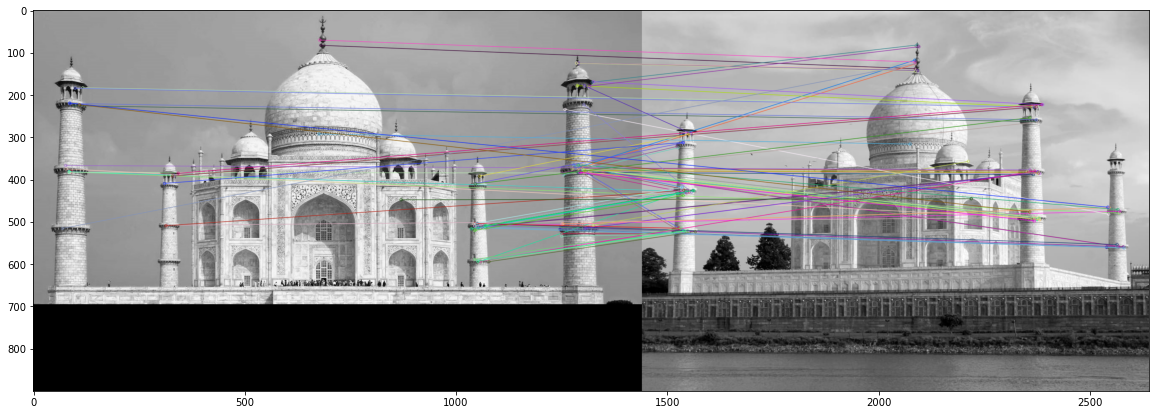

In [14]:
#implementing the feature matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(descriptors1, descriptors2)
#sorting the matches with respect to the distance
matches = sorted(matches,key = lambda x : x.distance)
res_img = np.copy(img1)
#storing the first 100 matches a/q to minimum distance
res_img = cv2.drawMatches(img1_gray, key_points1, img2_gray, key_points2, matches[:100], res_img, flags = 2)
#plotting the similar features
plt.figure(figsize=(20,20))
plt.imshow(res_img)
plt.show()